This project uses machine learning algorithms such as decision tree, logistic regression, and support vector machine (SVM) to classify heart disease based on a variety of input features. By analyzing datasets related to heart disease and utilizing various metrics such as confusion matrix, ConfusionMatrixDisplay, classification report, and Jaccard score, this project aims to accurately predict the presence or absence of heart disease in patients.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, jaccard_score
import warnings

%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading the data and performing a quick EDA.

In [2]:
df = pd.read_csv('/kaggle/input/heartdisease/heart.csv')
df.sample(7)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0


In [3]:
print(df.shape,'\n',df.dtypes)
df.describe()

(303, 14) 
 age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.corr() # checking for correlations.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trtbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalachh'}>],
       [<AxesSubplot: title={'center': 'exng'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slp'}>,
        <AxesSubplot: title={'center': 'caa'}>],
       [<AxesSubplot: title={'center': 'thall'}>,
        <AxesSubplot: title={'center': 'output'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

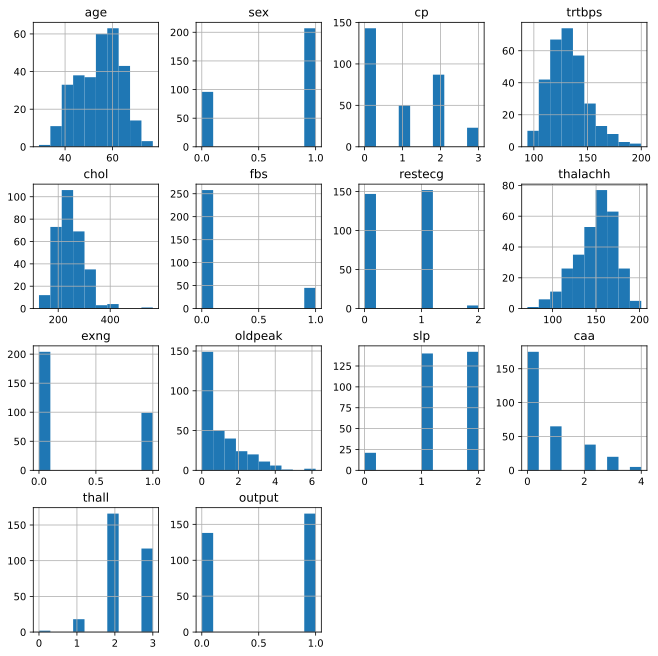

In [5]:
df.hist(figsize =(11, 11))

<AxesSubplot: xlabel='output', ylabel='count'>

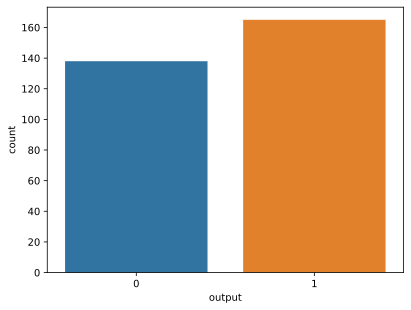

In [6]:
sns.countplot(x='output', data=df)

In [7]:
scaler = StandardScaler() # Normalizing the data and spliting data to train and test
cols = ['trtbps','chol','thalachh','age']
x = df.drop('output',axis=1)
y = df['output']
x[cols] = scaler.fit_transform(x[cols])
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
print(xtrain.shape,xtest.shape)

(242, 13) (61, 13)


trying different parameters for the classifier and comparing results.

In [8]:
for i in range(2,7):
  clft = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=24)
  clft.fit(xtrain,ytrain)
  print(f"for {i} as our max_depth we got {str(clft.score(xtest,ytest))[:4]} accuracy.")

for 2 as our max_depth we got 0.78 accuracy.
for 3 as our max_depth we got 0.81 accuracy.
for 4 as our max_depth we got 0.88 accuracy.
for 5 as our max_depth we got 0.80 accuracy.
for 6 as our max_depth we got 0.86 accuracy.


In [9]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=24) # going to stick with 4 max depth to avoid over-fitting.
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=24)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

0.8  Jaccard score
---


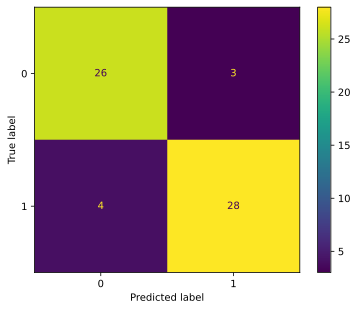

In [10]:
treepred = clf.predict(xtest)
cm = confusion_matrix(ytest,treepred)
cmplot = ConfusionMatrixDisplay(cm)
print(classification_report(ytest,treepred))
print(jaccard_score(ytest,treepred),' Jaccard score\n---')
cmplot.plot()

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

0.8852459016393442 
---
0.8055555555555556  Jaccard score
---


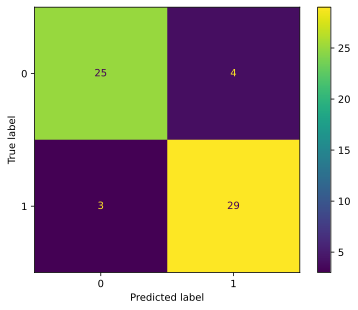

In [11]:
logreg = LogisticRegression() # applying logistic regression to the data and measuring it's performance
logreg.fit(xtrain,ytrain)
logpred = logreg.predict(xtest)
cm = confusion_matrix(ytest,logpred)
cmplot = ConfusionMatrixDisplay(cm)
print(classification_report(ytest,logpred))
print(logreg.score(xtest,ytest),'\n---')
print(jaccard_score(ytest,logpred),' Jaccard score\n---')
cmplot.plot()

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

0.8688524590163934 
---
0.7777777777777778  Jaccard score
---


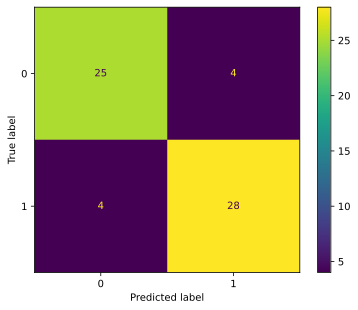

In [12]:
clsvm = svm.SVC(kernel='linear') # applying svm to the data and measuring it's performance
clsvm.fit(xtrain,ytrain)
svcpred = clsvm.predict(xtest)
print(classification_report(ytest,svcpred))
print(clsvm.score(xtest,ytest),'\n---')
print(jaccard_score(ytest,svcpred),' Jaccard score\n---')
cm = confusion_matrix(ytest,svcpred)
cmplot = ConfusionMatrixDisplay(cm)
cmplot.plot()

In [13]:
comparison = pd.DataFrame(ytest)
comparison['Tree'] = treepred
comparison['Logistic'] = logpred
comparison['SVC'] = svcpred
comparison.sample(17)

,output,Tree,Logistic,SVC
24,1,1,1,1
42,1,0,0,0
198,0,0,0,0
251,0,0,0,0
116,1,0,1,1
109,1,1,1,1
101,1,1,0,0
231,0,0,0,0
255,0,0,0,0
204,0,0,0,0
